In [18]:
import matplotlib.pyplot as plt 
import numpy as np
from datasets import load_dataset
import evaluate
import tqdm
from pylatexenc.latex2text import LatexNodes2Text

from math_equivalence import is_equiv

In [37]:
answers_all = np.load("../ckpts/math_fft_full/test_answers.npy")
# answers_all = np.load("../ckpts/math_fft_subsample_traincorrect1+/test_answers.npy")
# answers_all = np.load("../ckpts/math_fft_full_reformat/test_answers.npy")

In [27]:
dataset = load_dataset("hendrycks/competition_math")
test_answers = np.array(dataset["test"]['solution'])


/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/datasets/load.py:1461: FutureWarning: The repository for hendrycks/competition_math contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hendrycks/competition_math
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [42]:
set(dataset["test"]['level'])

{'Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5'}

In [43]:
test_levels = np.array([int(level[-1]) for level in dataset["test"]['level']])

In [70]:
test_answer_types = np.load("../ckpts/math_fft_subsample_traincorrect3+/test_answer_types.npy")

test_answer_correct = test_answer_types==0

In [71]:
level1_idxs = np.where(test_levels == 1)
print(np.mean(test_answer_correct[level1_idxs]))
level2_idxs = np.where(test_levels == 2)
print(np.mean(test_answer_correct[level2_idxs]))
level3_idxs = np.where(test_levels == 3)
print(np.mean(test_answer_correct[level3_idxs]))
level4_idxs = np.where(test_levels == 4)
print(np.mean(test_answer_correct[level4_idxs]))
level5_idxs = np.where(test_levels == 5)
print(np.mean(test_answer_correct[level5_idxs]))


0.13043478260869565
0.06711409395973154
0.0592396109637489
0.03871499176276771
0.01812688821752266


In [69]:
test_answer_types = np.load("../ckpts/math_fft_rand_traincorrect5+/test_answer_types.npy")

test_answer_correct = test_answer_types==0

level1_idxs = np.where(test_levels == 1)
print(np.mean(test_answer_correct[level1_idxs]))
level2_idxs = np.where(test_levels == 2)
print(np.mean(test_answer_correct[level2_idxs]))
level3_idxs = np.where(test_levels == 3)
print(np.mean(test_answer_correct[level3_idxs]))
level4_idxs = np.where(test_levels == 4)
print(np.mean(test_answer_correct[level4_idxs]))
level5_idxs = np.where(test_levels == 5)
print(np.mean(test_answer_correct[level5_idxs]))

0.08466819221967964
0.06263982102908278
0.04509283819628647
0.02471169686985173
0.01661631419939577


In [36]:


def last_boxed_only_string(string):
    idx = string.rfind("\\boxed")
    if idx < 0:
        idx = string.rfind("\\fbox")
        if idx < 0:
            return None
    i = idx
    right_brace_idx = None
    num_left_braces_open = 0
    while i < len(string):
        if string[i] == "{":
            num_left_braces_open += 1
        if string[i] == "}":
            num_left_braces_open -= 1
            if num_left_braces_open == 0:
                right_brace_idx = i
                break
        i += 1
    
    if right_brace_idx == None:
        retval = None
    else:
        retval = string[idx:right_brace_idx + 1]
    
    return retval

def remove_boxed(s):
    left = "\\boxed{"
    try:
        assert s[:len(left)] == left
        assert s[-1] == "}"
        return s[len(left):-1]
    except:
        return None


def remove_hastags(text):
    try:
        start = text.find("####")+len("####")
        end = text.rindex("####")
        return text[start:end]
    except:
        return None



def answer_type_individial(output , answer):
    if output[-len(" </s>"):] == " </s>":
        output = output[: -len(" </s>")]
    if output[-len("</s>"):] == "</s>":
        output = output[: -len("</s>")]
    
    answer = remove_boxed(last_boxed_only_string(answer))
    answer = LatexNodes2Text().latex_to_text(answer)
    print(answer)
    # output_answer = remove_boxed(last_boxed_only_string(output))
    output_answer = remove_hastags(output)

    print(output_answer)

    if output_answer is not None:
        
        eqiv = is_equiv(answer, output_answer.replace("\\endalign*", ""), verbose=False)
        print(eqiv)

        if eqiv:
            answer_type = 0
        else:
            answer_type = 1
    else:
        answer_type = 2
    return answer_type


answer_types_all = []
# answers_all = []
for i in range(len(answers_all)):
    answer_types = []
    for item in answers_all[i]:
        answer_type = answer_type_individial(item, test_answers[i])
        answer_types.append(answer_type)
    answer_types_all.append(answer_types)

answer_types_all = np.array(answer_types_all)
print((answer_types_all==0).mean())

2
1
False
10
-10
False
97
121/2
False
i
2
False
4
9
False
402
2400
False
x ∈[-2,7]
(-∞,2) ∪ (2,2)
False
7
25%
False
4,6,14,15
11,11,12,10
False
-1/8
3/2
False
x+2/7
x+1
False
-15
-8
False
10
9
False
8
9
False
75
144
False
11/2
(3,8)
False
-25
-7
False
8
15x
False
3
3
True
187.5
3
False
18
1
False
$40
$3.00
False
5
1001
False
8
13
False
3125
10
False
[0,∞)
(0,∞)
False
.5
1
False
12, 10, 6
12,13,14,15,16,17
False
5
4
False
16
36
False
2300
430
False
5
5
True
105
28
False
-13.5
26
False
243/625
68/2
False
2
27
False
(-√(3), √(3))
(-∞,1) ∪ (1,∞)
False
23
8
False
49
4
False
2x^9 - 8x^7 + 9x^6 - 16x^5 - 12x^4 + 9x^3 - 24x^2
-2x^2 + 10x - 8
 \endalign*
False
(-∞,-8)∪(8,∞)
9,10,11
False
0
20
False
2
-16
False
16
1
False
1/12
3/144
False
6+9i
-3i-3i^2
False
2
6
False
20
-16 - 12i
False
7(x+3) (x-3)
(7x+9)(x-7)
False
y^4-2y^3+7y^2+y-5
-4y^3 +5y^2 -2.
 \endalign*
False
4
None
0
0
True
12
861
False
7/2
64
False
69
360
False
5
4
False
(-∞,-1/2)∪(-1/2,∞)
(0,∞)
False
2/5
10
False
7
4
False
20
10-12i


In [32]:
output_answer

NameError: name 'output_answer' is not defined

In [38]:


# def reformat_final_answer(response):
#     try:
#         start1 = response.rindex("\\boxed{")
#         start2 = start1 + len("\\boxed{")
#         end = response.rindex("}")
#     except:
#         print(response)
#         start1 = response.rindex("\\boxed")
#         start2 = start1 + len("\\boxed")
#         end = response.rindex("$")
#     return response[start2:end].replace("\\endalign*", "")


def last_boxed_only_string(string):
    idx = string.rfind("\\boxed")
    if idx < 0:
        idx = string.rfind("\\fbox")
        if idx < 0:
            return None
    i = idx
    right_brace_idx = None
    num_left_braces_open = 0
    while i < len(string):
        if string[i] == "{":
            num_left_braces_open += 1
        if string[i] == "}":
            num_left_braces_open -= 1
            if num_left_braces_open == 0:
                right_brace_idx = i
                break
        i += 1
    
    if right_brace_idx == None:
        retval = None
    else:
        retval = string[idx:right_brace_idx + 1]
    
    return retval

def remove_boxed(s):
    left = "\\boxed{"
    try:
        assert s[:len(left)] == left
        assert s[-1] == "}"
        return s[len(left):-1]
    except:
        return None


def answer_type_individial(output , answer):
    if output[-len(" </s>"):] == " </s>":
        output = output[: -len(" </s>")]
    if output[-len("</s>"):] == "</s>":
        output = output[: -len("</s>")]
    
    # answer = LatexNodes2Text().latex_to_text(reformat_final_answer(answer))
    answer = remove_boxed(last_boxed_only_string(answer))
    # print(answer)
    output_answer = remove_boxed(last_boxed_only_string(output))
    # print(output_answer)

    if output_answer is not None:
        
        eqiv = is_equiv(answer, output_answer, verbose=False)

        if eqiv:
            answer_type = 0
        else:
            answer_type = 1
    else:
        answer_type = 2
    return answer_type


answer_types_all = []
# answers_all = []
for i in range(len(answers_all)):
    answer_types = []
    for item in answers_all[i]:
        answer_type = answer_type_individial(item, test_answers[i])
        answer_types.append(answer_type)
    answer_types_all.append(answer_types)

answer_types_all = np.array(answer_types_all)
print((answer_types_all==0).mean())

0.04802


In [74]:
train_levels = np.array([(level[-1]) for level in dataset["train"]['level']])

{'Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5', 'Level ?'}

In [76]:
train_answer_types = np.load("../ckpts/math_fft_full/train_answer_types.npy")
num_correct = ((train_answer_types==0).sum(axis=-1))

(array([2341.,  726.,  446.,  327.,  522.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

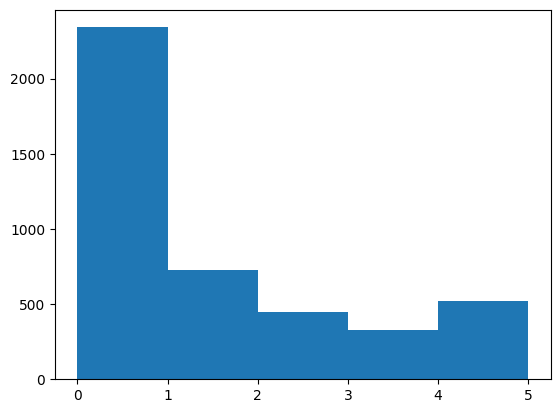

In [77]:
plt.hist(num_correct, bins=range(0, 6))